# Basic Testing

In this notebook we test that the main files work well.



# Setup

In [7]:
import numpy as np
from agents import Agent
from model import Model
from tqdm import tqdm
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2                     


# First Test (1 simulation)


In [8]:
n_agents = 100
my_network = nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)
my_model = Model(my_network, n_experiments=10, uncertainty=0.001,agent_type = "bayes")
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount


  0%|          | 22/10000 [00:00<00:19, 500.40it/s]


In [9]:
my_model.n_steps

23

100
Notice that this will have length len(steps_runned)


<Axes: title={'center': 'Mean Credences'}>

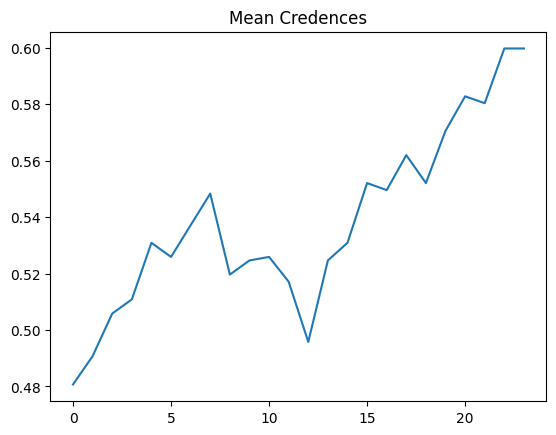

In [10]:
df = pd.DataFrame(my_model.agent_histories)
print(len(df))
mean_credences = df.mean()
print('Notice that this will have length len(steps_runned)')
mean_credences.plot(title='Mean Credences')

Notice that this will have length len(steps_runned)
This is the history of credences for each agent


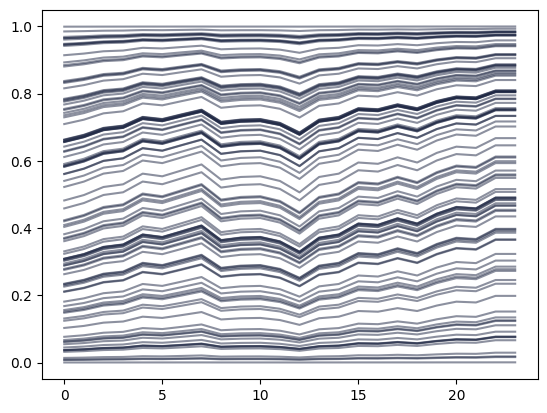

In [11]:
print('Notice that this will have length len(steps_runned)')
print('This is the history of credences for each agent')
for agent_hist in my_model.agent_histories:
    plt.plot(agent_hist,c="#1a2340",alpha=.5)

# Now 1 Simulation over Perceptron Network

In [6]:
import dill

In [7]:
# Use dill to deserialize the graph from a file
network1 = 'getting_networks/perceptron_graph_pre_1979.pkl'
network2 = 'getting_networks/peptic_ulcer_graph_pre_1978.pkl'
with open(network1, 'rb') as f:
    G_perceptron = dill.load(f)

print('\n')
print(G_perceptron.nodes(data=True))
print('\n')
# Create a mapping from node names to indexes
mapping = {node: index for index, node in enumerate(G_perceptron.nodes())}

# Relabel the nodes in the graph
G_perceptron_indexed = nx.relabel_nodes(G_perceptron, mapping)
print(G_perceptron_indexed.nodes(data=True))



[('https://openalex.org/A5076896748', {'authored_paper_count': 6, 'cited_count': 124, 'titles': ['The perceptron: A probabilistic model for information storage and organization in the brain.', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Series-Coupled Perceptron. II', 'The perceptron: A probabilistic model for information storage and organization in the brain.', 'Perceptron Simulation Experiments', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Perceptron Simulation Experiments', 'The perceptron: A probabilistic model for information storage and organization in the brain.', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Series-Coupled Perceptron. II', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Se

In [8]:
my_model = Model(G_perceptron_indexed, n_experiments=10, uncertainty=0.01,agent_type = "beta")
my_model.run_simulation(number_of_steps=200,show_bar=True) #number_of_steps is a max amount

100%|██████████| 200/200 [01:39<00:00,  2.00it/s]


3519
Notice that this will have length len(steps_runned)


<Axes: title={'center': 'Mean Credences'}>

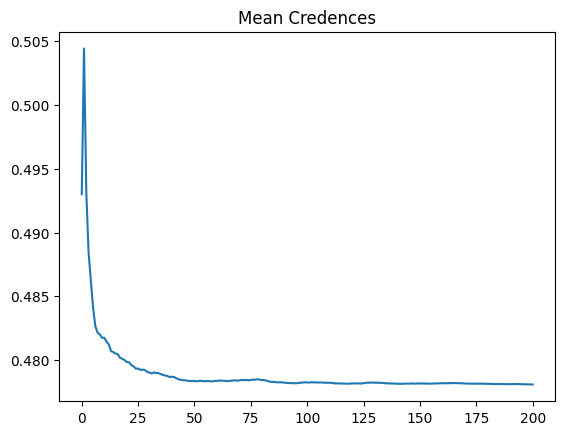

In [9]:
df = pd.DataFrame(my_model.agent_histories)
print(len(df))
mean_credences = df.mean()
print('Notice that this will have length len(steps_runned)')
mean_credences.plot(title='Mean Credences')

Notice that this will have length len(steps_runned)
This is the history of credences for each agent


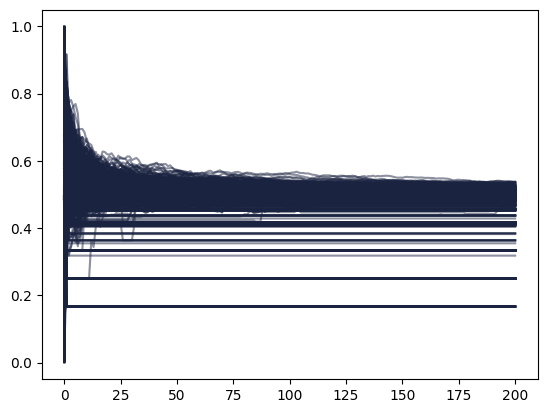

In [10]:
print('Notice that this will have length len(steps_runned)')
print('This is the history of credences for each agent')
for agent_hist in my_model.agent_histories:
    plt.plot(agent_hist,c="#1a2340",alpha=.5)

# Simulations with simple networks

(Here we replicate the wheel, cycle, complete setup)

## First we define the simulation function and run it

In [11]:
def create_graph(keyword, n_agents):
    if keyword == "complete":
        return nx.complete_graph(n_agents)
    elif keyword == "wheel":
        return nx.wheel_graph(n_agents)
    elif keyword == "cycle":
        return nx.cycle_graph(n_agents)
    else:
        raise ValueError("Invalid keyword. Please choose 'complete', 'wheel', or 'cycle'.")

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 20)
        network_keyword = random.choice(["complete", "wheel", "cycle"])
        network = create_graph(network_keyword, n_agents)
        uncertainty = 0.01
        n_experiments = random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "network_type" : network_keyword,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
# parameter_dictionaries = generate_parameters(50)


In [12]:
import numbers
def run_simulation_with_params(param_dict, number_of_steps=1000, show_bar=False,agent_type="beta"):
    # Extract the network directly since it's already a NetworkX graph object
    my_network = param_dict['network']
    # Other parameters are directly extracted from the dictionary
    my_model = Model(my_network, n_experiments=param_dict['n_experiments'], uncertainty=param_dict['uncertainty']
                    , agent_type=agent_type)
    # Run the simulation with predefined steps and show_bar option
    
    my_model.run_simulation(number_of_steps=number_of_steps, show_bar=show_bar)
  
    

    result_dict = {
        key: value 
        for key, value in param_dict.items() 
        if isinstance(value, (numbers.Number, str, tuple, list))}   
    result_dict['true_consensus'] = my_model.conclusion
    result_dict['true_consensus_alternative_stop'] = my_model.conclusion_alternative_stop
    #df = pd.DataFrame(my_model.agents_choices) 
    #result_dict['choice_consensus'] = df.mean()[len(df.mean())-1]
    result_dict['convergence_step'] = my_model.n_steps # takes note of the last reported step
    result_dict['agent_type']=agent_type
    
    return result_dict


parameter_dictionaries = generate_parameters(1000)  # Generate one for demonstration
result = run_simulation_with_params(parameter_dictionaries[1], number_of_steps=200, show_bar=False)
#print(result['choice_consensus'])
print(result['convergence_step'])


3


In [13]:
# Ensure your run_simulation_with_params function and others are defined

def run_simulations(param_list, number_of_steps=200, show_bar=False,agent_type="beta"):
    def run_simulation(param_dict):
        return run_simulation_with_params(param_dict, number_of_steps=number_of_steps, show_bar=show_bar,agent_type=agent_type)
    
    results = []
    # Iterate over each parameter dictionary in the list
    for params in tqdm(param_list, desc="Running simulations"):
        result = run_simulation(params)
        results.append(result)
    
    # Convert the list of results into a Pandas DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
parameter_dictionaries = generate_parameters(100)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=200, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 100/100 [00:01<00:00, 51.05it/s]

    n_agents network_type  uncertainty  n_experiments  true_consensus  \
0         11        cycle         0.01            408        0.909091   
1          7        wheel         0.01            319        0.000000   
2         14     complete         0.01            669        1.000000   
3          7        wheel         0.01            589        1.000000   
4         11        wheel         0.01            697        1.000000   
..       ...          ...          ...            ...             ...   
95        15     complete         0.01            537        1.000000   
96         4     complete         0.01            905        0.000000   
97         8     complete         0.01            664        0.000000   
98         6        cycle         0.01            862        0.000000   
99        20        cycle         0.01            928        1.000000   

    true_consensus_alternative_stop  convergence_step agent_type  
0                          0.909091                18   

In [14]:
# The difference between true consensus and choice consensus is that it happens to be the case that for the parameters explored
# if there is no true consensus at the end, then i think they should have different values
# maybe Im wrong
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   n_agents                         100 non-null    int64  
 1   network_type                     100 non-null    object 
 2   uncertainty                      100 non-null    float64
 3   n_experiments                    100 non-null    int64  
 4   true_consensus                   100 non-null    float64
 5   true_consensus_alternative_stop  100 non-null    float64
 6   convergence_step                 100 non-null    int64  
 7   agent_type                       100 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 6.4+ KB


## Now Some Standard Plotting

In [15]:
def plot_big_results(results_df=results_df,variable_of_interest = 'true_consensus'):
    grouped = results_df.groupby(['network_type', 'n_agents'])[variable_of_interest].mean().reset_index()

    # Preparing for the line plot
    #grouped['mid_bin'] = grouped['binned'].apply(lambda x: x.mid).astype(float)  # Getting the midpoint of bins for plotting

    # Plotting
    plt.figure(figsize=(12, 8))

    for network_type in results_df['network_type'].unique():
        subset = grouped[grouped['network_type'] == network_type]
        plt.plot(subset['n_agents'], subset[variable_of_interest], marker='o', label=network_type)

    plt.xlabel('Number of Agents')
    plt.ylabel('Share of '+variable_of_interest)
    plt.title('Share of '+ variable_of_interest +' by Number of Agents and Network Type')
    plt.title(network_type)

    plt.grid(True)
    plt.show()

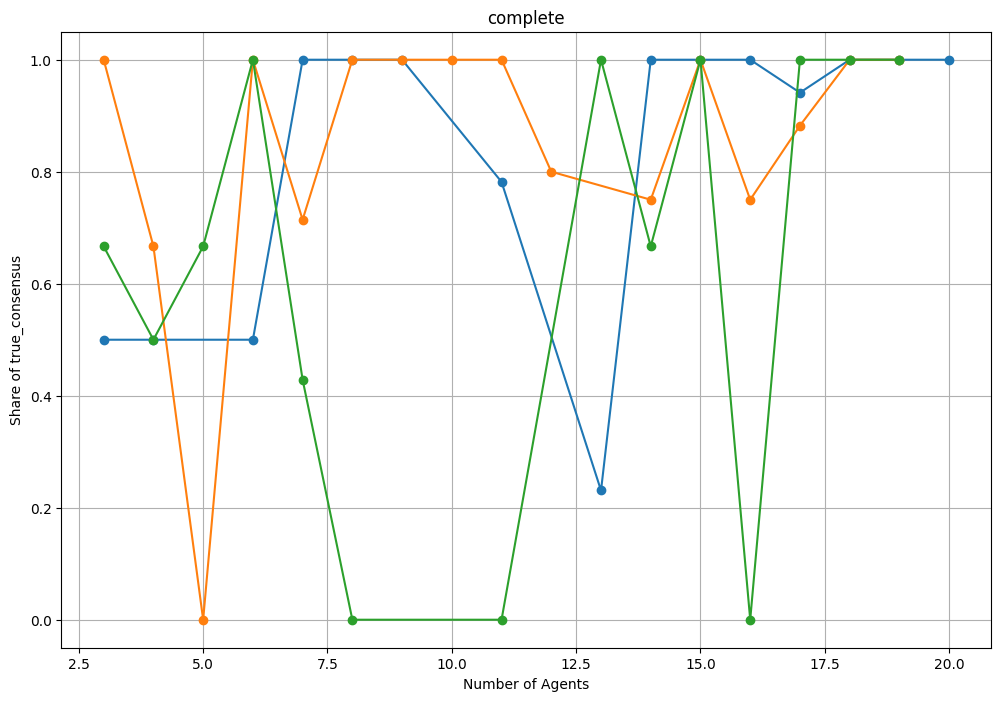

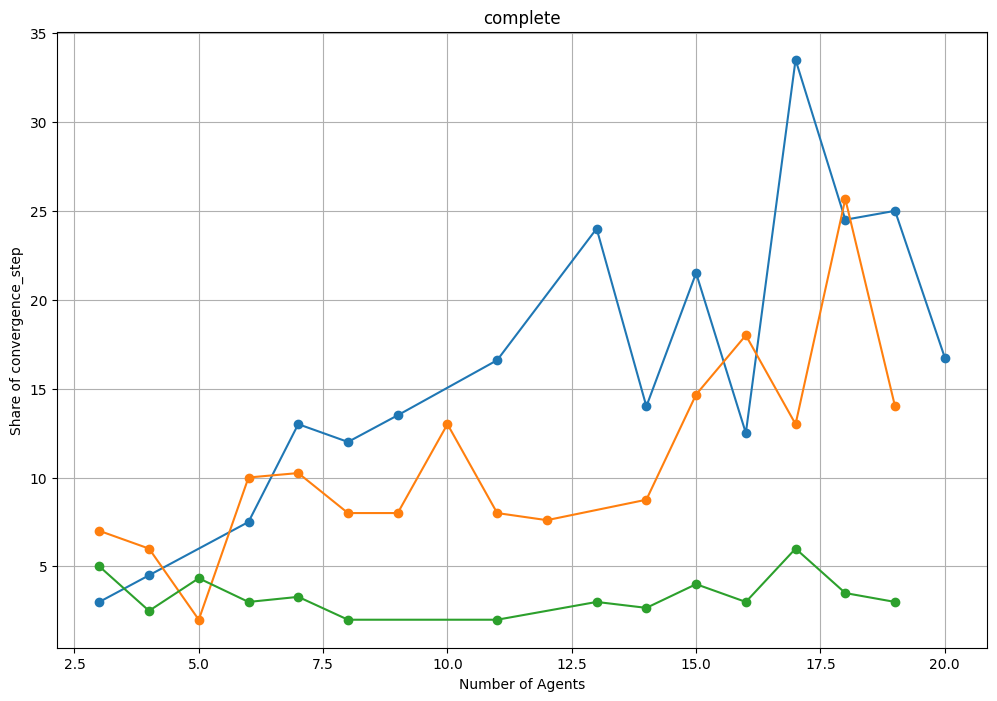

In [16]:
plot_big_results(variable_of_interest = 'true_consensus')
#plot_big_results(variable_of_interest = 'choice_consensus')
plot_big_results(variable_of_interest = 'convergence_step')

## Now some cool regression type of plotting

In [17]:
import pandas as pd
#!pip install pygam
from pygam import LogisticGAM, s
from sklearn.model_selection import train_test_split


def do_regression(results_df=results_df,variable_of_interest = 'true_consensus'):
    # Splitting the DataFrame by network type
    network_types = results_df['network_type'].unique()

    my_gams = {}

    for network_type in network_types:
        # Subset the DataFrame by network type
        subset = results_df[results_df['network_type'] == network_type]
        
        # Preparing the data
        X = subset[['n_agents']]
        y = subset[variable_of_interest]#.astype(int)  # Convert boolean to integer
        
        # Splitting the data into training and testing sets for model validation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Fitting the Logistic GAM model
        gam = LogisticGAM(s(0,n_splines=6)).fit(X_train, y_train)
        
        # Storing the model
        my_gams[network_type] = gam
        
        # Optionally, you can print out model accuracy or other statistics here
        print(f"Model for {network_type}:")
        print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
        print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
        print("-" * 30)
        
    return my_gams

def plot_regression(results_df=results_df,variable_of_interest = 'true_consensus'):
    my_gams = do_regression(results_df=results_df,variable_of_interest = variable_of_interest)
    # Set the size of the figure
    plt.figure(figsize=(10, 6))

    cmap= cmaps.colorblind_10

    X_range = np.linspace(results_df['n_agents'].min(), results_df['n_agents'].max(), 100)

    colors =[cmap(0), cmap(1/cmap.N), cmap(1/cmap.N*2)]

    for i, (network_type, gam) in enumerate(my_gams.items()):
        conf = gam.confidence_intervals(X_range.reshape(-1, 1), width=0.95, quantiles=None)
        plt.fill_between(X_range, conf[:, 0], conf[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)


    for i, (network_type, gam) in enumerate(my_gams.items()):
        # Generating a range of values for n_agents to predict and plot
        # Predicting with the model
        #y_pred, conf = pdep, confi = model.partial_dependence(term=0, width=.95)
        y_pred = gam.predict_proba(X_range.reshape(-1, 1))

        # Plotting predicted probabilities
        plt.plot(X_range, y_pred,c=colors[i], label=f'{network_type}')
        
    # Adding title, labels, and legend
    plt.title('Effect of n_agents on '+ variable_of_interest +' Probability')
    plt.xlabel('Number of Agents')
    plt.ylabel('Probability of ' +variable_of_interest)
    plt.legend()
    plt.show()

/Users/ignacioojea/GitRepositories/network_epistemology_playground/.conda/lib/python3.11/site-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/Users/ignacioojea/GitRepositories/network_epistemology_playground/.conda/lib/python3.11/site-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
/Users/ignacioojea/GitRepositories/network_epistemology_playground/.conda/lib/python3.11/site-packages/pygam/pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
/Users/ignacioojea/GitRepositories/network_epistemology_playground/.conda/lib/python3.11/site-packages/pygam/pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


Model for cycle:
Accuracy on training data: 0.6666666666666666
Accuracy on test data: 1.0
------------------------------
Model for wheel:
Accuracy on training data: 0.782608695652174
Accuracy on test data: 0.7272727272727273
------------------------------
Model for complete:
Accuracy on training data: 0.7619047619047619
Accuracy on test data: 0.7
------------------------------


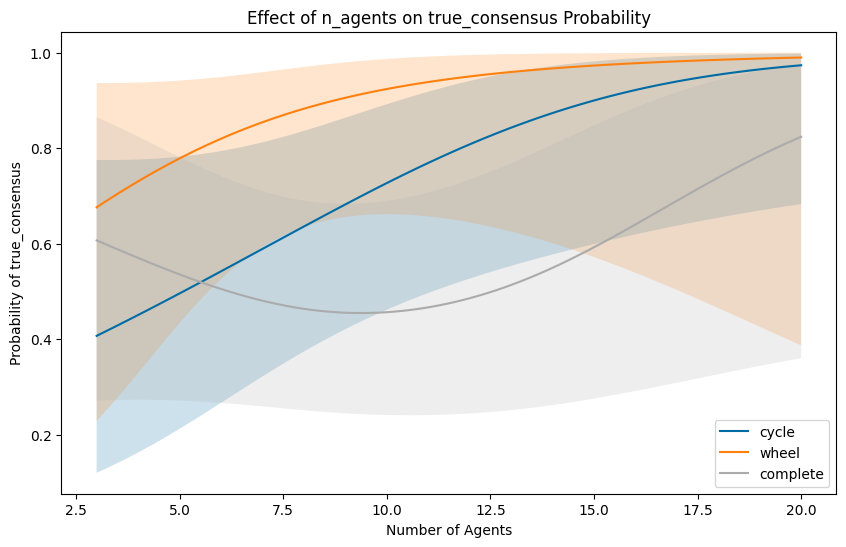

ValueError: y data is not in domain of logit link function. Expected domain: [0.0, 1.0], but found [2.0, 41.0]

In [18]:
plot_regression(results_df=results_df,variable_of_interest = 'true_consensus')
#plot_regression(results_df=results_df,variable_of_interest = 'choice_consensus')
plot_regression(results_df=results_df,variable_of_interest = 'convergence_step')

# Tunable networks

## Setup working code and run simulations

In [ ]:
random.uniform(0.001,0.01)

In [ ]:
def generate_parameters(n,rewiring_type='hierarchical'):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 15)
        degree = random.randint(1, n_agents-1)
        p_rewiring = random.uniform(0, 1)
        if rewiring_type=='hierarchical':
            network = create_hybrid_network(n_agents, degree=degree, p_rewiring=p_rewiring)
        if rewiring_type=='randomize':
            network = randomize_network_v2(n_agents, degree=degree, p_rewiring=p_rewiring)
        uncertainty = random.uniform(0.001,0.01)
        n_experiments = random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "degree": degree,
            "p_rewiring": p_rewiring,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments,
            "rewiring_type":rewiring_type
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)
random.choice(parameter_dictionaries)


In [ ]:
parameter_dictionaries = generate_parameters(100)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=200, show_bar=False,agent_type='bayes')
results_df.head()


In [ ]:
# Save DataFrame to CSV
results_df.to_csv('results_df.csv', index=False)  # index=False prevents writing row names (indices) to the file
df = pd.read_csv('results_df.csv')
df.head()

## Plotting

In [ ]:
def plot_full(results_df=results_df,variable_of_interest = 'true_consensus'): #this also does the regression
    # Preparing the data for true consensus
    X = results_df[['n_agents', 'degree', 'p_rewiring']]
    y = results_df[variable_of_interest]#.astype(int)  # Convert boolean to integer

    # Splitting the data into training and testing sets for model validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fitting the Logistic GAM model
    gam = LogisticGAM(s(0,n_splines=6) + s(1,n_splines=6) + s(2,n_splines=6) ).fit(X_train, y_train)

 #   print(f"Model for {network_type}:")
    print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
    print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
    print(gam.summary())

    # Suppose `gam` is your model and `gam.terms` contains the terms used in the model.
    # First, determine the number of plots (ignoring the intercept)
    plot_count = sum(not term.isintercept for term in gam.terms)
    
    cmap= cmaps.colorblind_10
    colors =[cmap(0), cmap(1/cmap.N), cmap(1/cmap.N*2)]
    # Start the figure
    plt.figure(figsize=(15, 5))  # Adjust the size as needed

    current_plot = 1
    # Initialize a list to store y-limits
    y_limits = []
    labels =['N-Agents', 'Degree', 'Prb. Rewiring']
    # First pass: compute the y-axis limits for all plots
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
        y_limits.append((min(pdep.min(), confi.min()), max(pdep.max(), confi.max())))

    # Global y limits
    global_y_min = min(limit[0] for limit in y_limits)
    global_y_max = max(limit[1] for limit in y_limits)

    # Second pass: plot with standardized y limits
    current_plot = 1
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        # Set the subplot position
        plt.subplot(1, plot_count, current_plot)
        plt.plot(XX[:, term.feature], pdep,c=colors[i])
        plt.plot(XX[:, term.feature], confi, c=colors[i], ls='--')
        
        plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)

        plt.ylim(global_y_min, global_y_max)  # Set global y limits
        plt.title(labels[i]+' on '+variable_of_interest)
        plt.xlabel('')  # Remove x-axis label
        plt.ylabel('')  # Remove y-axis label


        current_plot += 1  # Move to the next plot position

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show() 



In [ ]:
plot_full(results_df=results_df,variable_of_interest = 'true_consensus')
plot_full(results_df=results_df,variable_of_interest = 'choice_consensus')
plot_full(results_df=results_df,variable_of_interest = 'convergence_step')